In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#read excel file
data = pd.read_excel("/content/DS1_C4_S5_Employee_Data_Practice (1).xlsx")
data

,Employee_Code,Gender,Department,Annual Salary ($),Age,Work_Experience
0,1010,Male,IT,27000,22,0
1,1011,Female,IT,48000,27,4
2,1012,Male,Sales,75000,31,7
3,1013,Male,Sales,61000,29,6
4,1014,Female,Finance,45000,27,4
...,...,...,...,...,...,...
65,1074,Female,HR,82500,43,13
66,1075,Male,Sales,53500,28,5
67,1076,Female,HR,57000,29,6
68,1077,Male,Sales,66500,33,7


In [4]:
#check null values
df = pd.DataFrame(data)
null_counts = df.isnull().sum()

print("Null values in each column:")
print(null_counts)

Null values in each column:
Employee_Code        0
Gender               0
Department           0
Annual Salary ($)    0
Age                  0
Work_Experience      0
dtype: int64


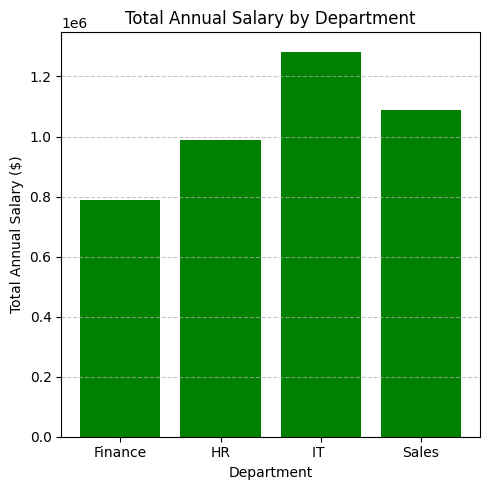

In [5]:
#task1:
department_salary_sum = df.groupby('Department')['Annual Salary ($)'].sum()

# Plotting the bar graph
plt.figure(figsize=(5,5))
plt.bar(department_salary_sum.index, department_salary_sum.values, color='Green')
plt.xlabel('Department')
plt.ylabel('Total Annual Salary ($)')
plt.title('Total Annual Salary by Department')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [6]:
#Task2:
#department and gender-wise count of employees
gender_count = df.groupby(['Department', 'Gender']).size().unstack(fill_value=0)

# Create a DataFrame with all department names and the respective male and female counts
gender_count_df = gender_count.reset_index()

# Rename columns for clarity
gender_count_df.columns.name = None
gender_count_df.columns = ['Department', 'Male Count', 'Female Count']

print("Department-wise Male and Female Employee Counts:")
print(gender_count_df)

Department-wise Male and Female Employee Counts:
  Department  Male Count  Female Count
0    Finance           2            11
1         HR          11             4
2        IT           10            12
3      Sales           4            16


In [7]:
#Task3:
df = pd.DataFrame(data)

# Filter the data where department is IT and work experience is 0
filtered_data = df[(df['Department'] == 'IT') & (df['Work_Experience'] == 0)]

# Calculate the average salary of the filtered data
average_salary = filtered_data['Annual Salary ($)'].mean()

print(f"The estimated salary for a new employee with no work experience in the IT department is: ${average_salary:}")

The estimated salary for a new employee with no work experience in the IT department is: $nan


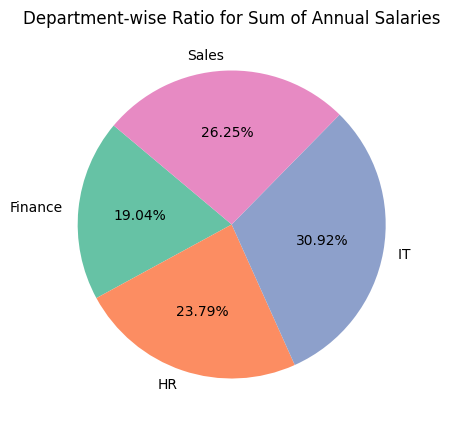

In [8]:
#Task4:
#the total annual salary by department
department_salary_sum = df.groupby('Department')['Annual Salary ($)'].sum()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(department_salary_sum.values,
        labels=department_salary_sum.index,
        autopct='%.2f%%',
        startangle=140,
        colors=plt.get_cmap('Set2').colors)

plt.title('Department-wise Ratio for Sum of Annual Salaries')
plt.show()


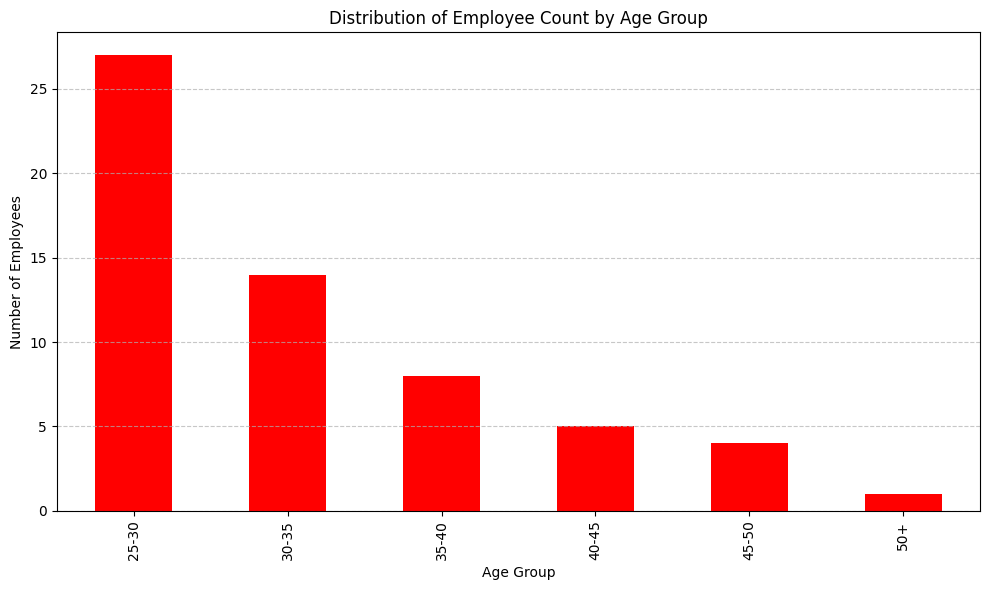

In [9]:
#Task5:
# Define age bins
bins = [25, 30, 35, 40, 45, 50, 55]  # Define bin edges
labels = ['25-30', '30-35', '35-40', '40-45', '45-50', '50+']  # Bin labels

# Create a new column 'Age Group' based on bins
df['Age Group'] = pd.cut(df['Age'], bins=bins, right=False, labels=labels)

# Plot the histogram
plt.figure(figsize=(10, 6))
df['Age Group'].value_counts().sort_index().plot(kind='bar', color='Red')

plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employee Count by Age Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

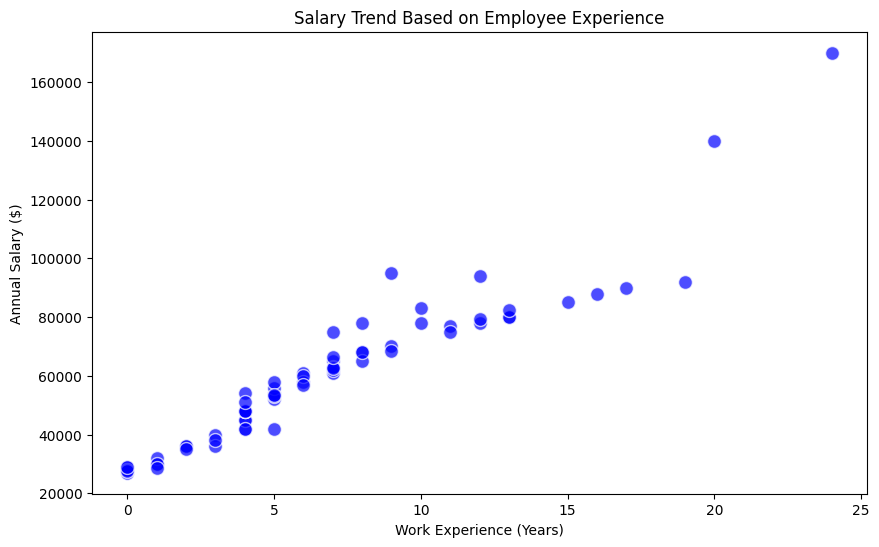

In [11]:
#Task6:
# Extract relevant columns
experience = data['Work_Experience']
salary = data['Annual Salary ($)']

# Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(experience, salary, c='blue', alpha=0.7, edgecolors='w', s=100)

# Adding titles and labels
plt.title('Salary Trend Based on Employee Experience')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Annual Salary ($)')

# Show plot
plt.show()


<Figure size 1200x800 with 0 Axes>

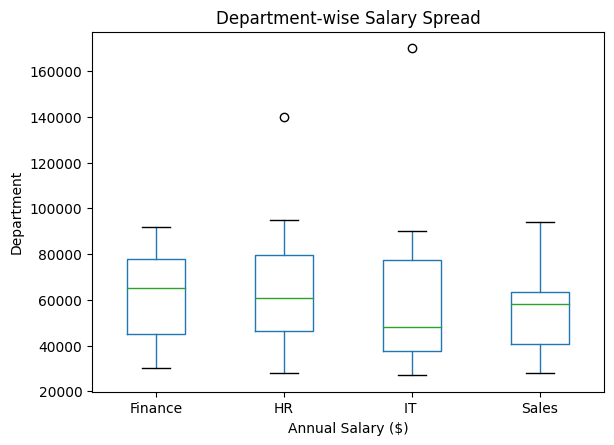

Departments with outliers in employee salary:
['HR', 'IT ']


In [13]:
#Task7:
# Create a box plot for each department
plt.figure(figsize=(12, 8))
data.boxplot(column='Annual Salary ($)', by='Department', grid=False)

# Adding titles and labels
plt.title('Department-wise Salary Spread')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Annual Salary ($)')
plt.ylabel('Department')

# Show plot
plt.show()

# Identify departments with outliers
# Boxplot identifies outliers based on the IQR method
departments_with_outliers = data.groupby('Department').apply(lambda x: x['Annual Salary ($)'].describe()['75%'] + 1.5 * (x['Annual Salary ($)'].describe()['75%'] - x['Annual Salary ($)'].describe()['25%']) < x['Annual Salary ($)'].max())

# List departments with outliers
departments_with_outliers_list = departments_with_outliers[departments_with_outliers].index.tolist()

print("Departments with outliers in employee salary:")
print(departments_with_outliers_list)